In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotly.graph_objects as go
import webbrowser
from scipy.optimize import curve_fit
from sympy import *
from utilsGraficas import oblique_graph, graficar_oblique_csv_plotly

CSV_PATH = "oblicuo120fps.csv"

def velocity(t, vo, g):
  return(vo*t + - (0.5)*g*(t**2))

df = pd.read_csv(CSV_PATH)
#path_to_html = oblique_graph(df)
#file_url = 'file://' + os.path.abspath(path_to_html).replace('\\', '/')
#webbrowser.open(file_url)
df = df.dropna().copy() # Elimino las filas que tienen NaNs
initial_guess = [0, 9.81]
#popt, pcov = curve_fit(velocity, xdata = df["Tiempo (s)"], ydata = df["Velocidad X (m/s)"])
params, covariance = curve_fit(velocity, df["Tiempo (s)"], df["Posición Y (m)"], p0=initial_guess)
v0y_est, g_est = params
errs = np.sqrt(np.diag(covariance))
print(params,errs)

[0.4861155  0.07647513] [0.01045791 0.00188442]


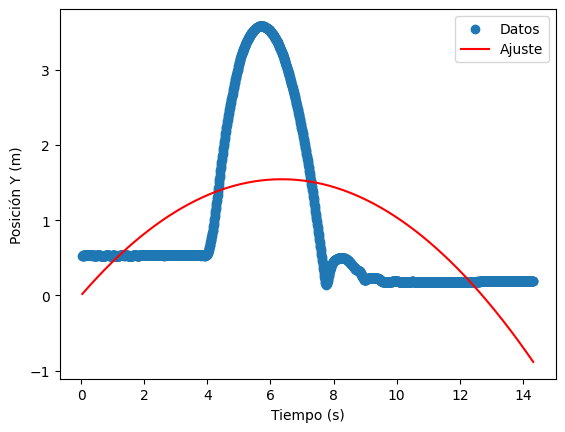

In [15]:
#fig = go.Figure()
#fig.add_traces(go.Scatter(x = df["Tiempo (s)"], y = df["Velocidad X (m/s)"], mode = 'markers'))
#fig.add_traces(go.Scatter(x = df["Tiempo (s)"], y = velocity(df["Tiempo (s)"],params[0],params[1])))
plt.scatter(df["Tiempo (s)"], df["Posición Y (m)"], label='Datos')
plt.plot(df["Tiempo (s)"], velocity(df["Tiempo (s)"], *params), color='red', label='Ajuste')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición Y (m)')
plt.legend()
plt.show()
